# Бенчмарк для задачи OneTwoTrip Contest

https://boosters.pro/championship/onetwotrip_challenge/overview
    
    
для студентов ВМК МГУ

2019, Александр Дьяконов www.dyakonov.org/ag/

In [2]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np
# для встроенных картинок
%pylab inline
# отключить предупреждения
import warnings
warnings.filterwarnings('ignore')
# прогресс-бар
from tqdm import tqdm, tqdm_notebook

Populating the interactive namespace from numpy and matplotlib


## загрузка данных

In [3]:
data_train = pd.read_csv('onetwotrip_challenge_train.csv')
data_test = pd.read_csv('onetwotrip_challenge_test.csv')
print ('размеры:', data_train.shape, data_test.shape)

размеры: (196056, 43) (455011, 37)


## посмотрим на данные

обратите внимание, как выводятся дата-фреймы

In [4]:
data_train.head()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0


In [5]:
data_test.head()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25
0,0,3a6a6af55e097d3f92705936a7ea3ca8aef651f5966832...,0,-0.548937,10,10,1,1,0,1,...,1,1,1,0,4,1,1,0,0,1
1,1,2df10f61960163da94a4294773ed9c865296e37c330304...,82,-0.626508,3,4,3,0,0,1,...,1,1,1,0,1,1,1,0,1,1
2,2,20dc3fec5b5eb42fbfe08119063c3a0010a73c7ec94abb...,0,-0.548937,6,8,1,1,0,2,...,35,1,1,0,2,1,0,0,1,1
3,3,ed75b3496977bac207eccb59dc91fe9a8d6a27777a6422...,6,0.304348,7,7,2,0,10,1,...,1,3,1,0,3,1,1,0,1,1
4,4,a346d08351c5fd0bda82984ed7c8b12b6395829da5b857...,115,-0.471365,3,3,2,0,0,1,...,1,1,1,0,1,1,1,0,1,1


## получаем таблички для обучения

In [6]:
# удаляем ненужные признаки
ids = data_test.pop('orderid') # сохраняем id для теста
data_test.drop(['userid'], inplace=True, axis=1)

In [7]:
cols = data_test.columns # значимые колонки
cols

Index(['field0', 'field1', 'field2', 'field3', 'field4', 'field5', 'field6',
       'field7', 'field8', 'field9', 'field10', 'field11', 'field12',
       'field13', 'field14', 'field15', 'field16', 'field17', 'field18',
       'field19', 'field20', 'field21', 'field22', 'field23', 'field24',
       'field25', 'field26', 'field27', 'field28', 'field29',
       'indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25'],
      dtype='object')

In [8]:
y = data_train.pop('goal1') # целевая переменная для первой задачи

In [9]:
y = y.values # мне так спокойней - в numpy.array

In [10]:
data_train = data_train[cols] # оставить только нужные колонки

In [11]:
# что получилось
data_train.head()

,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,...,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25
0,0,-0.626508,11,12,1,1,0,1,1,0,...,1,2,1,0,4,1,1,0,1,1
1,144,-0.393794,5,7,2,0,0,2,1,0,...,41,3,1,0,2,1,1,0,1,0
2,134,-0.548937,2,3,2,0,0,1,1,0,...,1,11,7,0,1,1,1,0,1,1
3,0,-0.238651,10,11,1,1,3,2,1,0,...,18,1,1,0,4,1,1,0,1,1
4,0,-0.704079,8,11,1,1,0,1,1,0,...,1,1,1,0,3,1,1,0,0,1


### Эксперименты

сначала делим выборку на обучение и тест

не самое лучшее решение, но для быстроты экспериментов сгодится

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.3, random_state=1)

### Случайный лес


строим по одному дереву и вычисляем метрику качества (ROC AUC)

обратите внимание на прогресс-бар

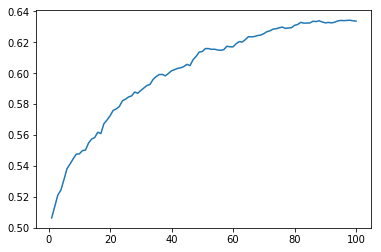

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(max_features=1, n_estimators=1, oob_score=False, warm_start=True, random_state=1)

aucs = []
for t in tqdm_notebook(list(range(1, 101))):
    model.set_params(n_estimators=t)
    model.fit(X_train, y_train)
    a = model.predict_proba(X_test)[:, 1]
    q = roc_auc_score(y_test, a)
    aucs.append(q)
    
plt.plot(range(1, 101), aucs)

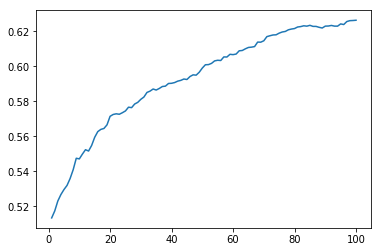

In [46]:
# аналогичные эксперименты с max_features=2

model = RandomForestClassifier(max_features=2, n_estimators=1, oob_score=False, warm_start=True, random_state=1)

aucs = []
for t in tqdm_notebook(list(range(1, 101))):
    model.set_params(n_estimators=t)
    model.fit(X_train, y_train)
    a = model.predict_proba(X_test)[:, 1]
    q = roc_auc_score(y_test, a)
    aucs.append(q)
    
plt.plot(range(1, 101), aucs)   

# Козырь

более хорошая модель из другой библиотеки

In [15]:
import lightgbm as lgb
model = lgb.LGBMClassifier(num_leaves=6, learning_rate=0.1, n_estimators=300)

In [16]:
param = {'num_leaves': 6, 'objective': 'binary', 'learning_rate': 0.1}
param['metric'] = 'auc'

q = lgb.train(param, train_set=lgb.Dataset(X_train, y_train), num_boost_round=500,
              valid_sets=[lgb.Dataset(X_train, y_train), lgb.Dataset(X_test, y_test)],
             verbose_eval=50)

[50]	valid_0's auc: 0.68674	valid_1's auc: 0.665981
[100]	valid_0's auc: 0.71142	valid_1's auc: 0.675922
[150]	valid_0's auc: 0.727589	valid_1's auc: 0.676426
[200]	valid_0's auc: 0.739755	valid_1's auc: 0.678309
[250]	valid_0's auc: 0.748912	valid_1's auc: 0.678582
[300]	valid_0's auc: 0.757664	valid_1's auc: 0.678602
[350]	valid_0's auc: 0.764987	valid_1's auc: 0.677316
[400]	valid_0's auc: 0.771289	valid_1's auc: 0.676125
[450]	valid_0's auc: 0.77833	valid_1's auc: 0.675192
[500]	valid_0's auc: 0.784456	valid_1's auc: 0.674098


тут сразу качество лучше

### Обучение и формирование ответа

In [17]:
model.fit(data_train, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
        n_jobs=-1, num_leaves=6, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [18]:
a = model.predict_proba(data_test)[:, 1] # вероятности за 1й класс

In [19]:
pd.DataFrame(a,  columns=['proba'], index=ids.values).to_csv('dj1_01_.csv')